In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Imports

In [3]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [4]:
from fastbook import *

With the fastai deep learning library, programming a neural network to perform state of the art predictions is as easy as ever. Looking at the cell below, we can see that within a few lines of codes, we are capable of downloading a dataset and loading it into our environment (using easy, intuitive syntax) and begin creating a model to accept different types of input. 
Here, we take advantage of the easy to use fastbook API to load our dataset into a single variable where the dataset is organized in such a way that all cat photos start with an uppercase letter and all dog photos start with a lowercase letter. Thus, we can write a one line boolean function to insert into the ImageDataLoaders class. The ImageDataLoaders class is especially designed to handle image inputs, and has other important parameters that can be altered depending on the usecase. Here, we make sure we create a validation split using 'valid_pct', and set the random seed to 42 to come up with reproducible results.

Also, in one line, we can create a convolutional neural network and specify the architecture we want to create. Though it is not clear from the code, we are utilizing transfer learning here, as the cnn_learner function has a parameter *pretrained* that defaults to true, meaning that the CNN was already pretrained on massive datasets, removing a lot of the work for us.

# **Image Input**: Convolutional Neural Network

In [5]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct = 0.2, seed = 42,
    label_func = is_cat, item_tfms = Resize(224))

learn = cnn_learner(dls, resnet34, metrics = error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.174445,0.037024,0.011502,00:49


epoch,train_loss,valid_loss,error_rate,time
0,0.057624,0.012180,0.002706,00:54


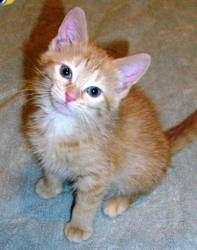

In [6]:
img = PILImage.create(image_cat())
img.to_thumb(500)

In [7]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

My dog, Lucky, would be delighted to know that she's not a cat.

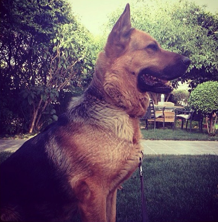

In [8]:
img = PILImage.create(uploader.data[0])
img.to_thumb(222)

In [9]:
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: False.
Probability it's a cat: 0.000194


Now as we move on to another example of possible inputs we can demonstrate the strength of fastai, as the use of the high level API removes a lot of the friction in dealing with the intricate details of creating a neural network.


# **Segmentation**

Segmentation, the ability of a model to recognize the content of individual pixels in an image, is different than Image Classification.
Segmentation would generally be considered a more complicated task than image classification, but with the use of fastai, it is simplified into a few lines of code yet again.

In [10]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str))

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.715839,2.442370,00:01


epoch,train_loss,valid_loss,time
0,2.037387,1.695413,00:01
1,1.711216,1.285695,00:01
2,1.481792,1.386254,00:01
3,1.334857,0.990375,00:01
4,1.214466,0.847604,00:01
5,1.107338,0.769767,00:01
6,1.011539,0.717390,00:01
7,0.934488,0.715748,00:01


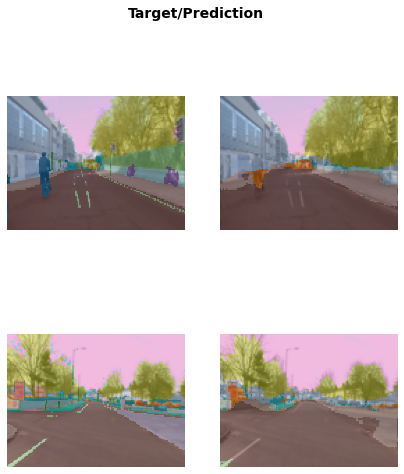

In [11]:
learn.show_results(max_n = 6, figsize = (7,8))

# **Text**

Deep Learning also has seen huge success in the area of Natural Language Processing (NLP). Here, by utilizing the TextDataLoaders class, we can classify the sentiment of a movie review with state of the art models with minimal effort.
We use AWD-LSTM, a specific variant of Long Short Term Memory models that has seen massive success over the past few years and is said to be dominating state of the art language modeling.

In [12]:
from fastai.text.all import *
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid = 'test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.470564,0.409399,0.815080,03:58


epoch,train_loss,valid_loss,accuracy,time
0,0.301468,0.304518,0.868280,07:51
1,0.244116,0.204254,0.921600,07:52
2,0.184672,0.191138,0.927440,07:51
3,0.145230,0.190657,0.929920,07:52


In [13]:
learn.predict('That movie was awesome!')

('pos', tensor(1), tensor([0.0252, 0.9748]))

# **Tabular**

Most companies in the world have massive amounts of tabular data and wish to make use of it to derive actionable insights. Here is how you can use state of the art models on tabular data in a few lines of code. You could use this to create decision trees that help in making business decisions over large amounts of data.

In [14]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names='salary',
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [15]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.358805,0.357480,0.832924,00:05
1,0.354741,0.344978,0.839220,00:05
2,0.341626,0.341017,0.844595,00:05


# **Collaborative Filtering**

Similarly, many businesses might want to make predictions (filtering) about the interests of their users based on their previous purchases/interactions with the company. Understanding associations between people, certain items, time of the year, etc. can bring in huge revenue for the company if implemented and utilized properly. Here, we demonstrate how simple it is to set up a Collaborative Filtering model to predict movie ratings on a scale of 0.5 to 5.

In [17]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range = (0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.521195,1.375353,00:00


epoch,train_loss,valid_loss,time
0,1.401749,1.319513,00:00
1,1.291421,1.144563,00:00
2,1.044436,0.835746,00:00
3,0.808788,0.699367,00:00
4,0.703757,0.669893,00:00
5,0.662569,0.660922,00:00
6,0.626344,0.657224,00:00
7,0.631231,0.655277,00:00
8,0.618528,0.654626,00:00
9,0.617007,0.654511,00:00


In [18]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,44.0,96.0,4.5,3.884463
1,65.0,47.0,5.0,4.502003
2,14.0,67.0,3.0,3.724008
3,67.0,46.0,2.0,2.861464
4,89.0,82.0,1.0,4.043110
5,47.0,34.0,3.0,4.037658
6,15.0,42.0,3.5,3.377755
7,62.0,62.0,3.0,4.159387
8,54.0,57.0,4.0,4.089459
